# Intro

When a new notebook is created through PLAXIS 2D Input, you have two objects available. One of them is the "s_i" object which represents the application server which can be accessed as follows:

In [1]:
s_i  # The application server

You can also access the "g_i" object which represents the global environment:

In [2]:
g_i  # The global environment

<Global object>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [4]:
def get_geometry(B0, B, D0, D, fill_angle):
    geo = {}
    geo['points'] = ['B1', 'B2', 'B3', 'B4', 'B4', 'B6', 'F1', 'F2', 'S1', 'S2', 'S3']
    geo['B1'] = np.array([0, D + 3 * B])
    geo['B2'] = np.array([B0/2, D + 3 * B])
    geo['B3'] = np.array([B0/2, 3 * B + D0])
    geo['B4'] = np.array([B/2, 3 * B + D0])
    geo['B5'] = np.array([B/2, 3 * B])
    geo['B6'] = np.array([0, 3 * B])
    geo['F1'] = np.array([B/2 + 2 * D0 + D / np.tan(np.radians(fill_angle)), 3 * B + D])
    geo['F2'] = np.array([B/2 + 2 * D0, 3 * B])
    geo['S1'] = np.array([B/2 + 2 * D0 + D / np.tan(np.radians(fill_angle)) + 1.5 * B, 3 * B + D])
    geo['S2'] = np.array([B/2 + 2 * D0 + D / np.tan(np.radians(fill_angle)) + 1.5 * B, 0])
    geo['S3'] = np.array([0, 0])
    
    geo['footing'] = np.array([geo['B1'], geo['B2'], geo['B3'], geo['B4'], geo['B5'], geo['B6'], geo['B1']])
    geo['fill'] = np.array([geo['B2'], geo['F1'], geo['F2'], geo['B5'], geo['B4'], geo['B3'], geo['B2']])
    geo['soil'] = np.array([geo['S3'], geo['B6'], geo['F2'], geo['F1'], geo['S1'], geo['S2'], geo['S3']])
    
    
    point_coords = np.array([geo[point] for point in geo['points']])
    geo['xmin'] = 0 
    geo['xmax'] = np.max(point_coords[:, 0])
    geo['ymin'] = 0
    geo['ymax'] = np.max(point_coords[:, 1])
    return geo

def plot_geometry(geo):
    fig, ax = plt.subplots(1, 1)

    patches = []
    patches.append(Polygon(geo['footing'], True))    
    patches.append(Polygon(geo['fill'], True))
    patches.append(Polygon(geo['soil'], True))

    p = PatchCollection(patches, alpha=.4, facecolor=['grey','greenyellow','tan'], lw=0)
    ax.add_collection(p)

    ax.plot(geo['footing'][:, 0], geo['footing'][:, 1],'-k')
    ax.plot(geo['fill'][:, 0], geo['fill'][:, 1],'-k')
    ax.plot(geo['soil'][:, 0], geo['soil'][:, 1],'-k')

    point_coords = np.array([geo[i] for i in geo['points']])

    ax.set_xlim([0, 1.2 * geo['xmax'] ])
    ax.set_ylim([0, 1.2 * geo['ymax']])
    ax.grid(alpha=0.4)
    plt.close(fig)
    return fig

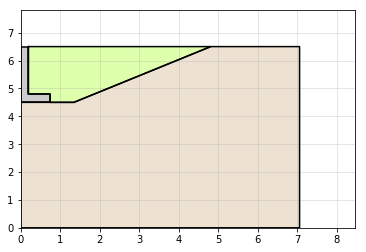

In [3]:
geo = get_geometry(0.4, 1.5, 0.30, 2, 30)
plot_geometry(geo)

In [4]:
def set_prop(title, comments):
    g_i.setproperties("Title",title, "Comments",comments, "ModelType","Axisymmetry" )

In [5]:
def build_geometry(mdl, geo):
    g_i.gotostructures()
    out = g_i.polygon(list(geo['B1']), list(geo['B2']), list(geo['B3']), 
                      list(geo['B4']), list(geo['B5']), list(geo['B6']))
    mdl['polygon_footing'] = out[0]
    mdl['soil_footing'] = out[1]
    
    out = g_i.polygon(list(geo['B2']), list(geo['F1']), list(geo['F2']),
                      list(geo['B5']), list(geo['B4']), list(geo['B3']))
    mdl['polygon_fill'] = out[0]
    mdl['soil_fill'] = out[1]
    out = g_i.polygon(list(geo['B6']), list(geo['F2']), list(geo['F1']),
                      list(geo['S1']), list(geo['S2']), list(geo['S3']))
    mdl['polygon_sand'] = out[0]
    mdl['soil_sand'] = out[1]
    
    out = g_i.lineload(list(geo['B1']), list(geo['B2']))
    mdl['PointB1'] = out[0]
    mdl['PointB2'] = out[1]
    mdl['LineB1B2'] = out[2]
    mdl['LineLoad'] = out[3]

    out = g_i.posinterface(list(geo['B2']), list(geo['B3']), list(geo['B4']),
                           list(geo['B5']), list(geo['B6']))
    mdl['PointB2_2'] = out[0]
    mdl['PointB3'] = out[1]
    mdl['PointB4'] = out[2]
    mdl['PointB5'] = out[3]
    mdl['PointB6'] = out[4]
    mdl['LineB2B3'] = out[5]
    mdl['LineB3B4'] = out[6]
    mdl['LineB4B5'] = out[7]
    mdl['LineB5B6'] = out[8]
    mdl['InterfaceB2B3'] = out[9]
    mdl['InterfaceB3B4'] = out[10]
    mdl['InterfaceB4B5'] = out[11]
    mdl['InterfaceB5B6'] = out[12]
    return mdl

def del_geometry(mdl):
    g_i.gotostructures()
    g_i.delete(mdl['polygon_footing'])
    g_i.delete(mdl['polygon_fill'])
    g_i.delete(mdl['polygon_sand'])
    g_i.delete(mdl['LineLoad'])
    g_i.delete(mdl['PointB1'])
    g_i.delete(mdl['PointB2'])
    g_i.delete(mdl['PointB6'])
    g_i.delete(mdl['PointB5'])
    g_i.delete(mdl['PointB4'])
    g_i.delete(mdl['PointB3'])
    g_i.delete(mdl['PointB2_2'])

In [6]:
def build_materials(mdl, material):
    g_i.gotosoil()
    mdl['concrete'] = g_i.soilmat("MaterialName","concrete", "MaterialNumber", 0, "SoilModel", 1, "DrainageType", 1 ,
                                  "Eref", material['concrete']['E'] * 1000, "nu", material['concrete']['nu'], 
                                  "gammaSat", material['concrete']['gamma'], "gammaUnsat", material['concrete']['gamma'])

    mdl['sand'] = g_i.soilmat("MaterialName","sand", "MaterialNumber", 1, "SoilModel", 3, "DrainageType", 0,
                             'gammaSat', material['sand']['gamma_sat'], 'gammaUnsat',material['sand']['gamma_unsat'],
                             'einit', material['sand']['e0'], 'E50ref', material['sand']['E50ref'],
                             'EoedRef', material['sand']['Eoedref'], 'EurRef', material['sand']['Euref'],
                             'powerm', material['sand']['powerm'], 'cref', material['sand']['c'],
                             'phi', material['sand']['phi'], 'psi', material['sand']['psi'],
                             'nu', material['sand']['nu'], 'K0nc',material['sand']['K0nc'],
                             'perm_primary_horizontal_axis', material['sand']['kx'],
                             'perm_vertical_axis', material['sand']['ky'],
                             'Rinter', material['sand']['Rinter'])

    mdl['fill'] = g_i.soilmat("MaterialName","fill", "MaterialNumber", 1, "SoilModel", 3, "DrainageType", 0,
                              'gammaSat', material['fill']['gamma_sat'], 'gammaUnsat',material['fill']['gamma_unsat'],
                              'einit', material['fill']['e0'], 'E50ref', material['fill']['E50ref'],
                              'EoedRef', material['fill']['Eoedref'], 'EurRef', material['fill']['Euref'],
                              'powerm', material['fill']['powerm'], 'cref', material['fill']['c'],
                              'phi', material['fill']['phi'], 'psi', material['fill']['psi'],
                              'nu', material['fill']['nu'], 'K0nc',material['fill']['K0nc'],
                              'perm_primary_horizontal_axis', material['fill']['kx'],
                              'perm_vertical_axis', material['fill']['ky'],
                              'Rinter', material['fill']['Rinter'])
    return mdl

def del_materials(mdl):
    g_i.gotosoil()
    g_i.delete(mdl['concrete'])
    g_i.delete(mdl['sand'])
    g_i.delete(mdl['fill'])

In [7]:
def build_phases(mdl):
    g_i.gotostages()

    g_i.Model.CurrentPhase = g_i.InitialPhase
    g_i.activate(mdl['polygon_sand'], g_i.Model.CurrentPhase)
    g_i.activate(mdl['polygon_fill'], g_i.Model.CurrentPhase)
    g_i.activate(mdl['polygon_footing'], g_i.Model.CurrentPhase)

    g_i.set(g_i.Soil_3_1.Material, g_i.Model.CurrentPhase, mdl['sand'])
    g_i.set(g_i.Soil_2_1.Material, g_i.Model.CurrentPhase, mdl['sand'])
    g_i.set(g_i.Soil_1_1.Material, g_i.Model.CurrentPhase, mdl['sand'])

    mdl['excavation phase'] = g_i.phase(g_i.InitialPhase)
    mdl['excavation phase'].Identification = "excavation"
    g_i.Model.CurrentPhase = mdl['excavation phase']
    g_i.deactivate(mdl['polygon_fill'], g_i.Model.CurrentPhase)
    g_i.deactivate(mdl['polygon_footing'], g_i.Model.CurrentPhase)

    mdl['construction phase'] = g_i.phase(mdl['excavation phase'])
    mdl['construction phase'].Identification = "construction"
    g_i.Model.CurrentPhase = mdl['construction phase']
    g_i.activate(mdl['polygon_fill'], g_i.Model.CurrentPhase)
    g_i.activate(mdl['polygon_footing'], g_i.Model.CurrentPhase)
    g_i.activate(mdl['LineB2B3'], g_i.Model.CurrentPhase)
    g_i.activate(mdl['LineB3B4'], g_i.Model.CurrentPhase)
    g_i.activate(mdl['LineB4B5'], g_i.Model.CurrentPhase)
    g_i.activate(mdl['LineB5B6'], g_i.Model.CurrentPhase)
    g_i.set(g_i.Soil_2_1.Material, g_i.Model.CurrentPhase, mdl['fill'])
    g_i.set(g_i.Soil_1_1.Material, g_i.Model.CurrentPhase, mdl['concrete'])


    mdl['loading phase'] = g_i.phase(mdl['construction phase'])
    mdl['loading phase'].Identification = "loading"
    g_i.Model.CurrentPhase = mdl['loading phase']
    g_i.activate(mdl['LineB1B2'], g_i.Model.CurrentPhase)
    g_i.set(g_i.LineLoad_1_1.qy_start, g_i.Model.CurrentPhase, -300)
    return mdl

def delete_phases(mdl):
    g_i.gotostages()
    g_i.delete(mdl['loading phase'])
    g_i.delete(mdl['construction phase'])
    g_i.delete(mdl['excavation phase'])
    g_i.Model.CurrentPhase = g_i.InitialPhase
    g_i.deactivate(mdl['polygon_sand'], g_i.Model.CurrentPhase)
    g_i.deactivate(mdl['polygon_fill'], g_i.Model.CurrentPhase)
    g_i.deactivate(mdl['polygon_footing'], g_i.Model.CurrentPhase)

In [8]:
def build_model(title, comments, B0, B, D0, D, fill_angle, mesh_density, material):
    mdl = {}
    geo = get_geometry(B0, B, D0, D, fill_angle)
    fig = plot_geometry(geo)
    set_prop(title, comments)
    mdl = build_geometry(mdl, geo)
    mdl = build_materials(mdl, material)
    g_i.gotomesh()
    mesh = g_i.mesh(mesh_density)
    mdl = build_phases(mdl)
    return mdl, fig

In [9]:
title = "Embedded footing in sand"
comments = ""

B0 = 0.4
B = 1.5
D0 = 0.30
D = 2
fill_angle = 32

mesh_density = 0.06

material = {}
material['concrete'] = {}
material['concrete']['fc'] = 24000 # kPa
material['concrete']['E'] = 4700 *  np.sqrt(material['concrete']['fc']) # kPa
material['concrete']['nu'] = 0.4 #
material['concrete']['gamma'] = 24 # kN/m3

material['sand'] = {}
material['sand']['gamma_unsat'] = 17
material['sand']['gamma_sat'] = 20
material['sand']['e0'] = 0.2
material['sand']['E50ref'] = 4e4
material['sand']['Eoedref'] = 4e4
material['sand']['Euref'] = 1.2e5
material['sand']['powerm'] = 0.5
material['sand']['c'] = 0
material['sand']['phi'] = 32
material['sand']['psi'] = 2
material['sand']['nu'] = 0.2
material['sand']['K0nc'] = 0.4701
material['sand']['kx'] = 1
material['sand']['ky'] =1
material['sand']['Rinter'] = 0.67


material['fill'] = {}
material['fill']['gamma_unsat'] = 17
material['fill']['gamma_sat'] = 20
material['fill']['e0'] = 0.2
material['fill']['E50ref'] = 4e4
material['fill']['Eoedref'] = 4e4
material['fill']['Euref'] = 1.2e5
material['fill']['powerm'] = 0.5
material['fill']['c'] = 0
material['fill']['phi'] = 32
material['fill']['psi'] = 2
material['fill']['nu'] = 0.2
material['fill']['K0nc'] = 0.4701
material['fill']['kx'] = 1
material['fill']['ky'] =1
material['fill']['Rinter'] = 0.67


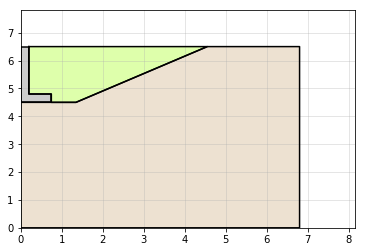

In [10]:
mdl, fig = build_model(title, comments, B0, B, D0, D, fill_angle, mesh_density, material)
fig

In [11]:
g_i.calculate()

'OK'